In [0]:
#https://github.com/Dataweekends/zero_to_deep_learning_video/blob/master/course/4%20Deep%20Learning%20Intro.ipynb

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


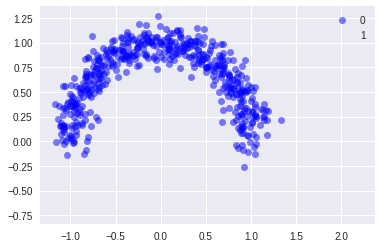

In [53]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=1000, noise=0.1,random_state=0)
plt.plot(X[y==0,0], X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0], X[y==1,1],'xr',alpha=0.5)
plt.legend(['0','1'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [0]:
model=Sequential()
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))
model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [57]:
model.fit(X_train,y_train,epochs=20,verbose=0)
results=model.evaluate(X_test,y_test)
results

300/300 [==============================] - 0s 297us/step


[0.2764032554626465, 0.8666666666666667]

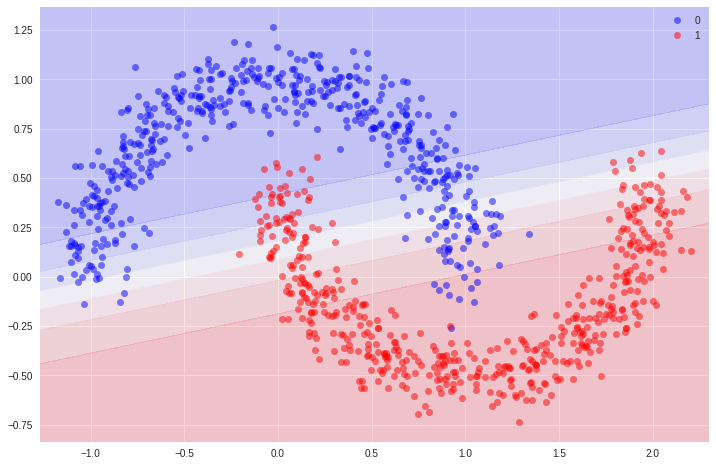

In [58]:
def plot_decision_boundary(model,X,y):
  amin, bmin =X.min(axis=0)-0.1
  amax, bmax =X.max(axis=0)+0.1
  hticks=np.linspace(amin, amax,101)
  vticks=np.linspace(bmin,bmax,101)
  
  aa,bb=np.meshgrid(hticks,vticks)
  ab=np.c_[aa.ravel(),bb.ravel()]
  
  c=model.predict(ab)
  cc=c.reshape(aa.shape)
  
  plt.figure(figsize=(12,8))
  plt.contourf(aa,bb,cc,cmap='bwr',alpha=0.2)
  plt.plot(X[y==0,0], X[y==0,1],'ob',alpha=0.5)
  plt.plot(X[y==1,0], X[y==1,1],'or',alpha=0.5)
  plt.legend(['0','1'])

plot_decision_boundary(model,X,y)

In [0]:
model=Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh'))
model.add(Dense(2,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [60]:
model.fit(X_train,y_train,epochs=300,verbose=0)

In [61]:
results=model.evaluate(X_test,y_test)
results

300/300 [==============================] - 0s 352us/step


[0.04217988342357178, 0.9966666666666667]

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_train_pred=model.predict_classes(X_train)
y_test_pred=model.predict_classes(X_test)

print('Accuracy score on the train set is :',accuracy_score(y_train_pred,y_train))
print('Accuracy score on the test set is :',accuracy_score(y_test_pred,y_test))

Accuracy score on the train set is : 0.9985714285714286
Accuracy score on the test set is : 0.9966666666666667


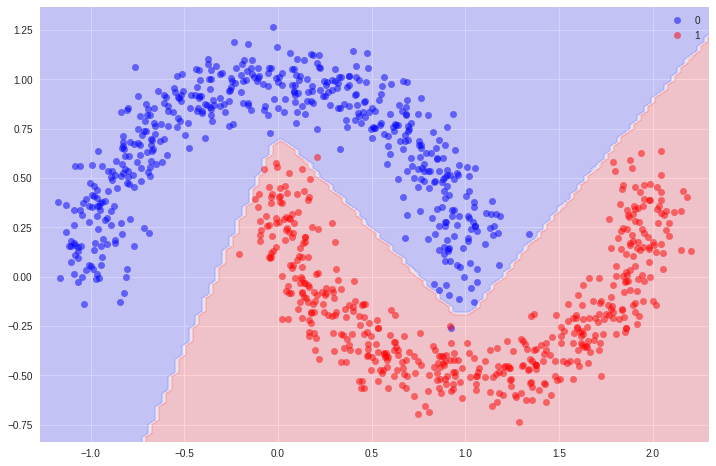

In [63]:
def plot_decision_boundary(model,X,y):
  amin, bmin =X.min(axis=0)-0.1
  amax, bmax =X.max(axis=0)+0.1
  hticks=np.linspace(amin, amax,101)
  vticks=np.linspace(bmin,bmax,101)
  
  aa,bb=np.meshgrid(hticks,vticks)
  ab=np.c_[aa.ravel(),bb.ravel()]
  
  c=model.predict(ab)
  cc=c.reshape(aa.shape)
  
  plt.figure(figsize=(12,8))
  plt.contourf(aa,bb,cc,cmap='bwr',alpha=0.2)
  plt.plot(X[y==0,0], X[y==0,1],'ob',alpha=0.5)
  plt.plot(X[y==1,0], X[y==1,1],'or',alpha=0.5)
  plt.legend(['0','1'])

plot_decision_boundary(model,X,y)

In [0]:
### Multi Class Classification

In [64]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [65]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "iris.csv" with length 5107 bytes


In [67]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


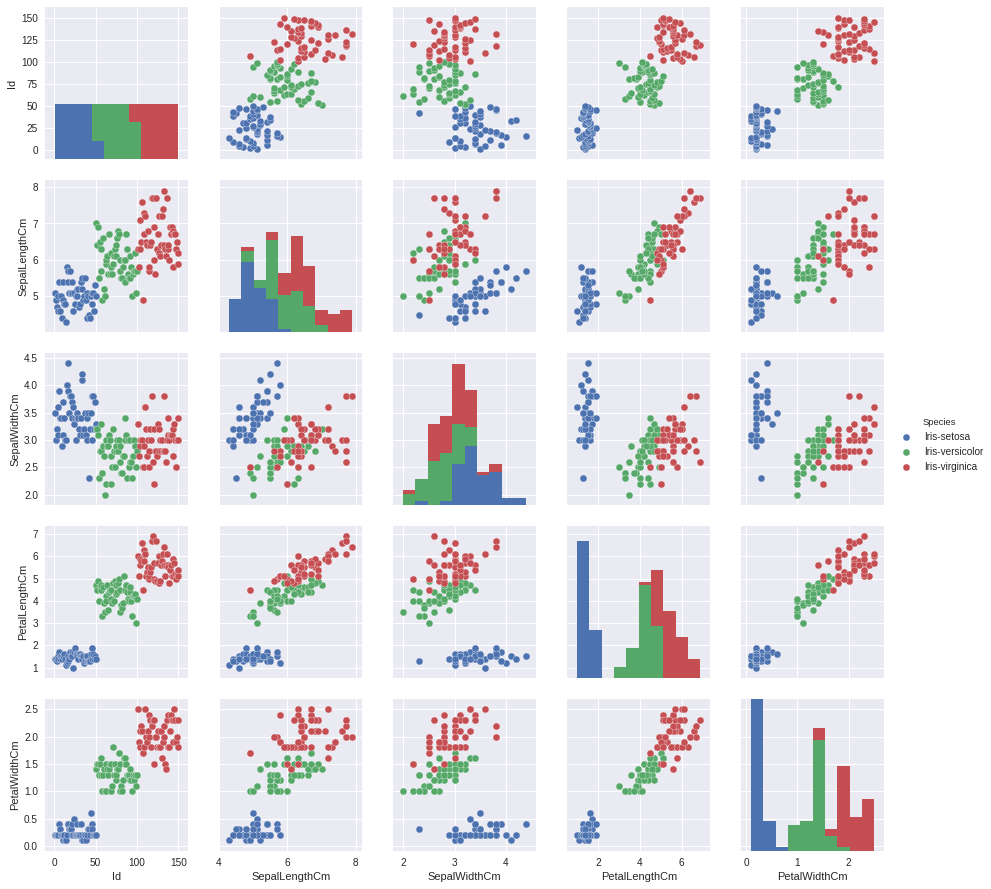

In [69]:
import seaborn as sns
sns.pairplot(df, hue="Species")

In [71]:
X = df.drop('Species', axis=1)
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [73]:
target_names = df['Species'].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
target_dict = {}